#Introducción

El presente trabajo revisa una base de datos sobre diamantes.
Incluye información sobre precio de venta, y características físicas y de calidad de cada uno de ellos.

##Objetivo

Utilizar un modelo de Machine Learning para predecir el precio del diamante a partir de características físicas otorgadas del mismo.

##Metodología:


1.   Realizar un análisis exploratorio de los datos, para conocer las características de las variables de trabajo.
2.   Hacer una limpieza del Dataset para su posterior manipulación.
3.   Realizar un procesamiento de datos a fin de homologar variables.
4.   Identificar un modelo de Machine Learning aplicable al dataset para predecir el precio de los diamantes.


# 1. Importación de módulos y del dataset



In [ ]:
! pip install lazypredict

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

# Lazy Predict
import lazypredict
from lazypredict.Supervised import LazyRegressor

# Regresión Lineal y Random Forest
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Eliminar warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EQ 24 MACHINE LEARNING SANTANDER/diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.80,57.00,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.10,55.00,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.80,60.00,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.00,58.00,2757,6.15,6.12,3.74


In [ ]:
df.price.describe()

count   53940.00
mean     3932.80
std      3989.44
min       326.00
25%       950.00
50%      2401.00
75%      5324.25
max     18823.00
Name: price, dtype: float64

In [ ]:
df.price.describe()

count   53940.00
mean     3932.80
std      3989.44
min       326.00
25%       950.00
50%      2401.00
75%      5324.25
max     18823.00
Name: price, dtype: float64

In [ ]:
df.cut.describe()

count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object

In [ ]:
df.color.describe()

count     53940
unique        7
top           G
freq      11292
Name: color, dtype: object

In [ ]:
df.clarity.describe()

count     53940
unique        8
top         SI1
freq      13065
Name: clarity, dtype: object

El dataset a revisar tiene información sobre 53,940 diamantes. El precio va desde los 326 USD a los 18,823 USD, con un promedio de precio de 3,832 USD. Sin embargo, sólo el 25% de los diamantes está por encima de los 5,324.25 USD., siendo muy pocos los que alcanzan valores arriba de los 10,000 USD.

Incluye información además sobre el quilate del diamante (peso del mismo), el tipo de corte (Fair, Good, Very Good, Premium, Ideal), el color del mismo (D (mejor), E, F, G, H, I, J (peor)), la claridad del material (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor)), dimensiones en largo, ancho y alto, porcentaje de profundidad, y tamaño de la mesa.

# 2. Preprocesamiento de data

## 2.1 Limpieza de datos
Buscamos eliminar y/o corregir todos los datos de nuestro dataset que cumplan los siguientes criterios:

1.   Columnas repetidas
2.   Valores nulos
3.   Duplicados
4.   Valores iguales a cero
5.   Valores extremos
6.   Aquellos con tipos de dato no adecuados

Como podemos observar de nuestro dataset, logramos ver que la primera columna, es decir, 'Unnamed: 0' no es requerida, puesto que la libreria pandas provee un índice automático a la hora de crear un DataFrame.

In [ ]:
# Eliminar columna repetida
df = df.drop(columns= ['Unnamed: 0'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


Ahora, buscaremos si existen valores nulos, y además comprobaremos que los tipos de datos sean los adecuados para trabajar.

In [ ]:
# No hay valores nulos y los tipos de datos son correctos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Revisamos si en nuestro data frame existen duplicados, en el caso de que existan buscaremos eliminarlos y posteriormente reindexaremos el DataFrame.

In [ ]:
# Revisar duplicados
duplicate_rows = df.duplicated().sum()
print(f'Número de filas duplicadas: {duplicate_rows}')

Número de filas duplicadas: 146


In [ ]:
# Eliminar duplicados
df = df.drop_duplicates()
duplicate_rows = df.duplicated().sum()
print(f'Número de filas duplicadas: {duplicate_rows}')

# Reindexar
df = df.reset_index(drop=True)
df.head()

Número de filas duplicadas: 0


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


Verificaremos la presencia de valores iguales a cero en nuestro DataFrame mediante la búsqueda de los valores mínimos. En caso de que los encontremos, filtraremos el índice para identificar los registros en los que alguna de las columnas contenga datos iguales a cero. Luego procederemos a eliminar estos registros y reindexar el DataFrame.


In [ ]:
# Revisar si hay valores con 0
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00,53794.00,53794.00,53794.00,53794.00,53794.00,53794.00
mean,0.80,61.75,57.46,3933.07,5.73,5.73,3.54
std,0.47,1.43,2.23,3988.11,1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,951.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5326.75,6.54,6.54,4.03
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


In [ ]:
# Número de filas con 0
drop_z = df[df['z'] == 0].index
drop_y = df[df['y'] == 0].index
drop_x = df[df['x'] == 0].index
drop_rows = drop_z.union(drop_y).union(drop_x)

print(f'Número de filas con 0 en las columnas "x", "y" y "z": {len(drop_rows)}')

Número de filas con 0 en las columnas "x", "y" y "z": 19


In [ ]:
# Eliminar filas con 0
df = df.drop(drop_rows, axis=0)
print(f'Número de filas con 0 en las columnas "x", "y" y "z": {len(df[(df["x"]==0) & (df["y"]==0) & (df["z"]==0)])}')

# Reindexar
df = df.reset_index(drop=True)
df

Número de filas con 0 en las columnas "x", "y" y "z": 0


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53770,0.72,Ideal,D,SI1,60.80,57.00,2757,5.75,5.76,3.50
53771,0.72,Good,D,SI1,63.10,55.00,2757,5.69,5.75,3.61
53772,0.70,Very Good,D,SI1,62.80,60.00,2757,5.66,5.68,3.56
53773,0.86,Premium,H,SI2,61.00,58.00,2757,6.15,6.12,3.74


Usaremos un pairplot, puesto que esta herramienta nos permite la visualización y exploración de las relaciones que podemos tener entre las múltiples variables de nuestro DataFrame.

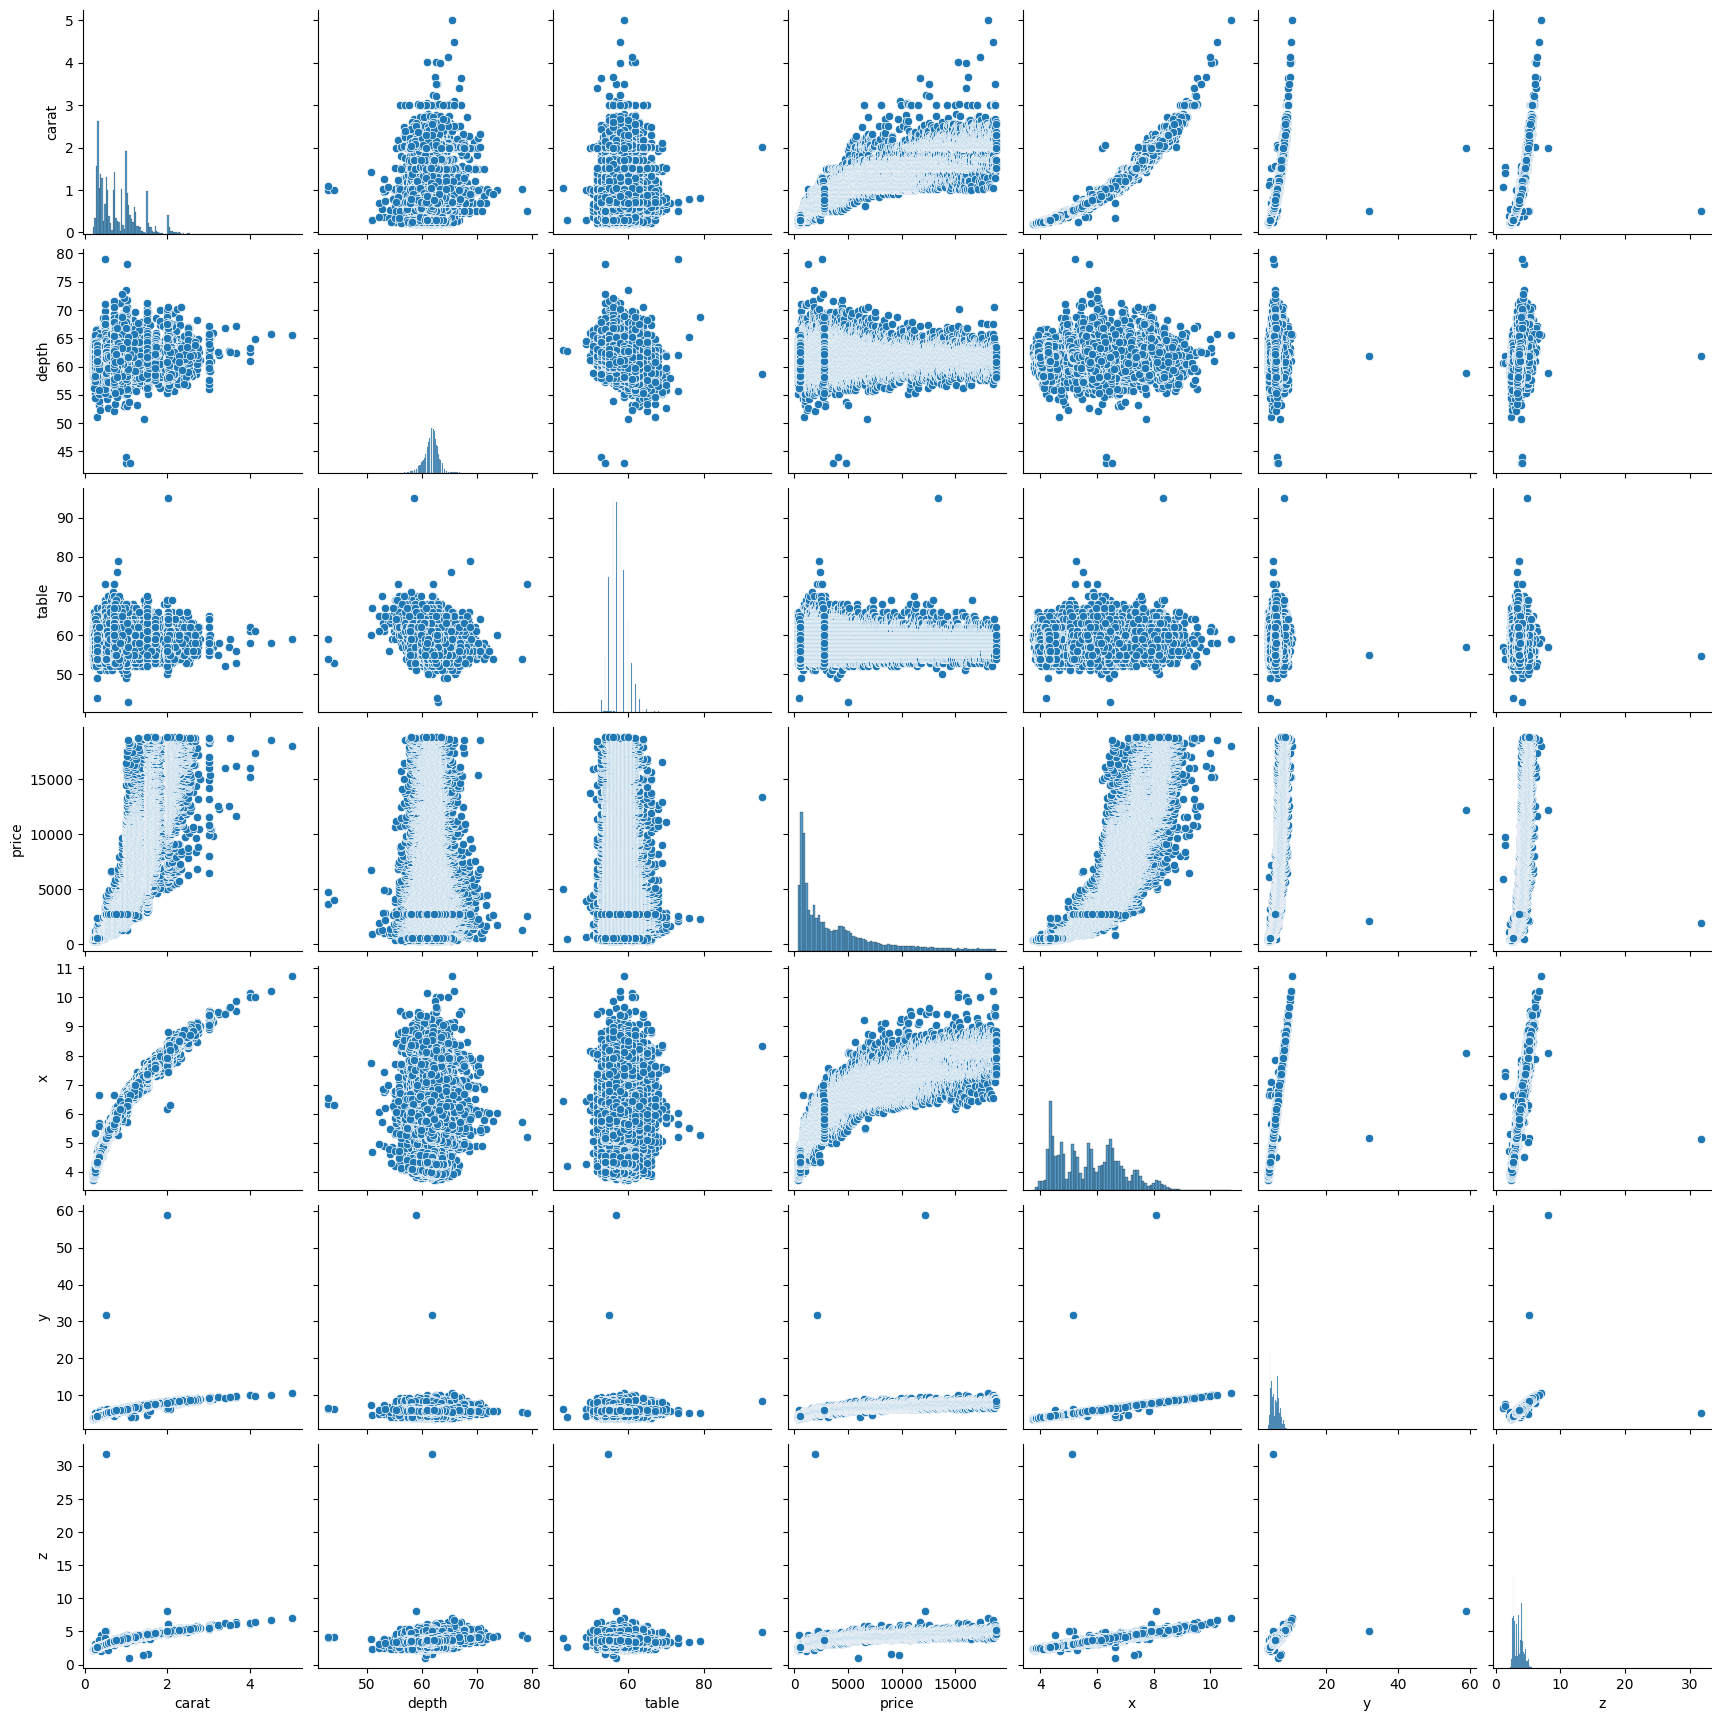

In [ ]:
# Pairplot
sns.pairplot(df);

Observamos la presencia de varios valores atípicos en nuestro conjunto de datos. Por lo tanto, procederemos a su eliminación, ya que en algunas de las gráficas observadas se pueden apreciar diversos tipos de relaciones, que van desde lineales hasta logarítmicas. Además, tambien volveremos a reindexar todo el índice.

Además, es evidente que estos valores atípicos generan un alto nivel de ruido, lo que podría resultar en un modelo poco preciso en etapas posteriores del análisis.

In [ ]:
# Retirar valores extremos
drop_z = df[df['z'] > 30].index
drop_y = df[df['y'] > 30].index
drop_x = df[df['x'] < 2].index
drop_table = df[df['table'] > 80].index

drop_rows = drop_z.union(drop_y).union(drop_x).union(drop_table)
df = df.drop(drop_rows, axis=0)

# Reindexar filas
df = df.reset_index(drop=True)

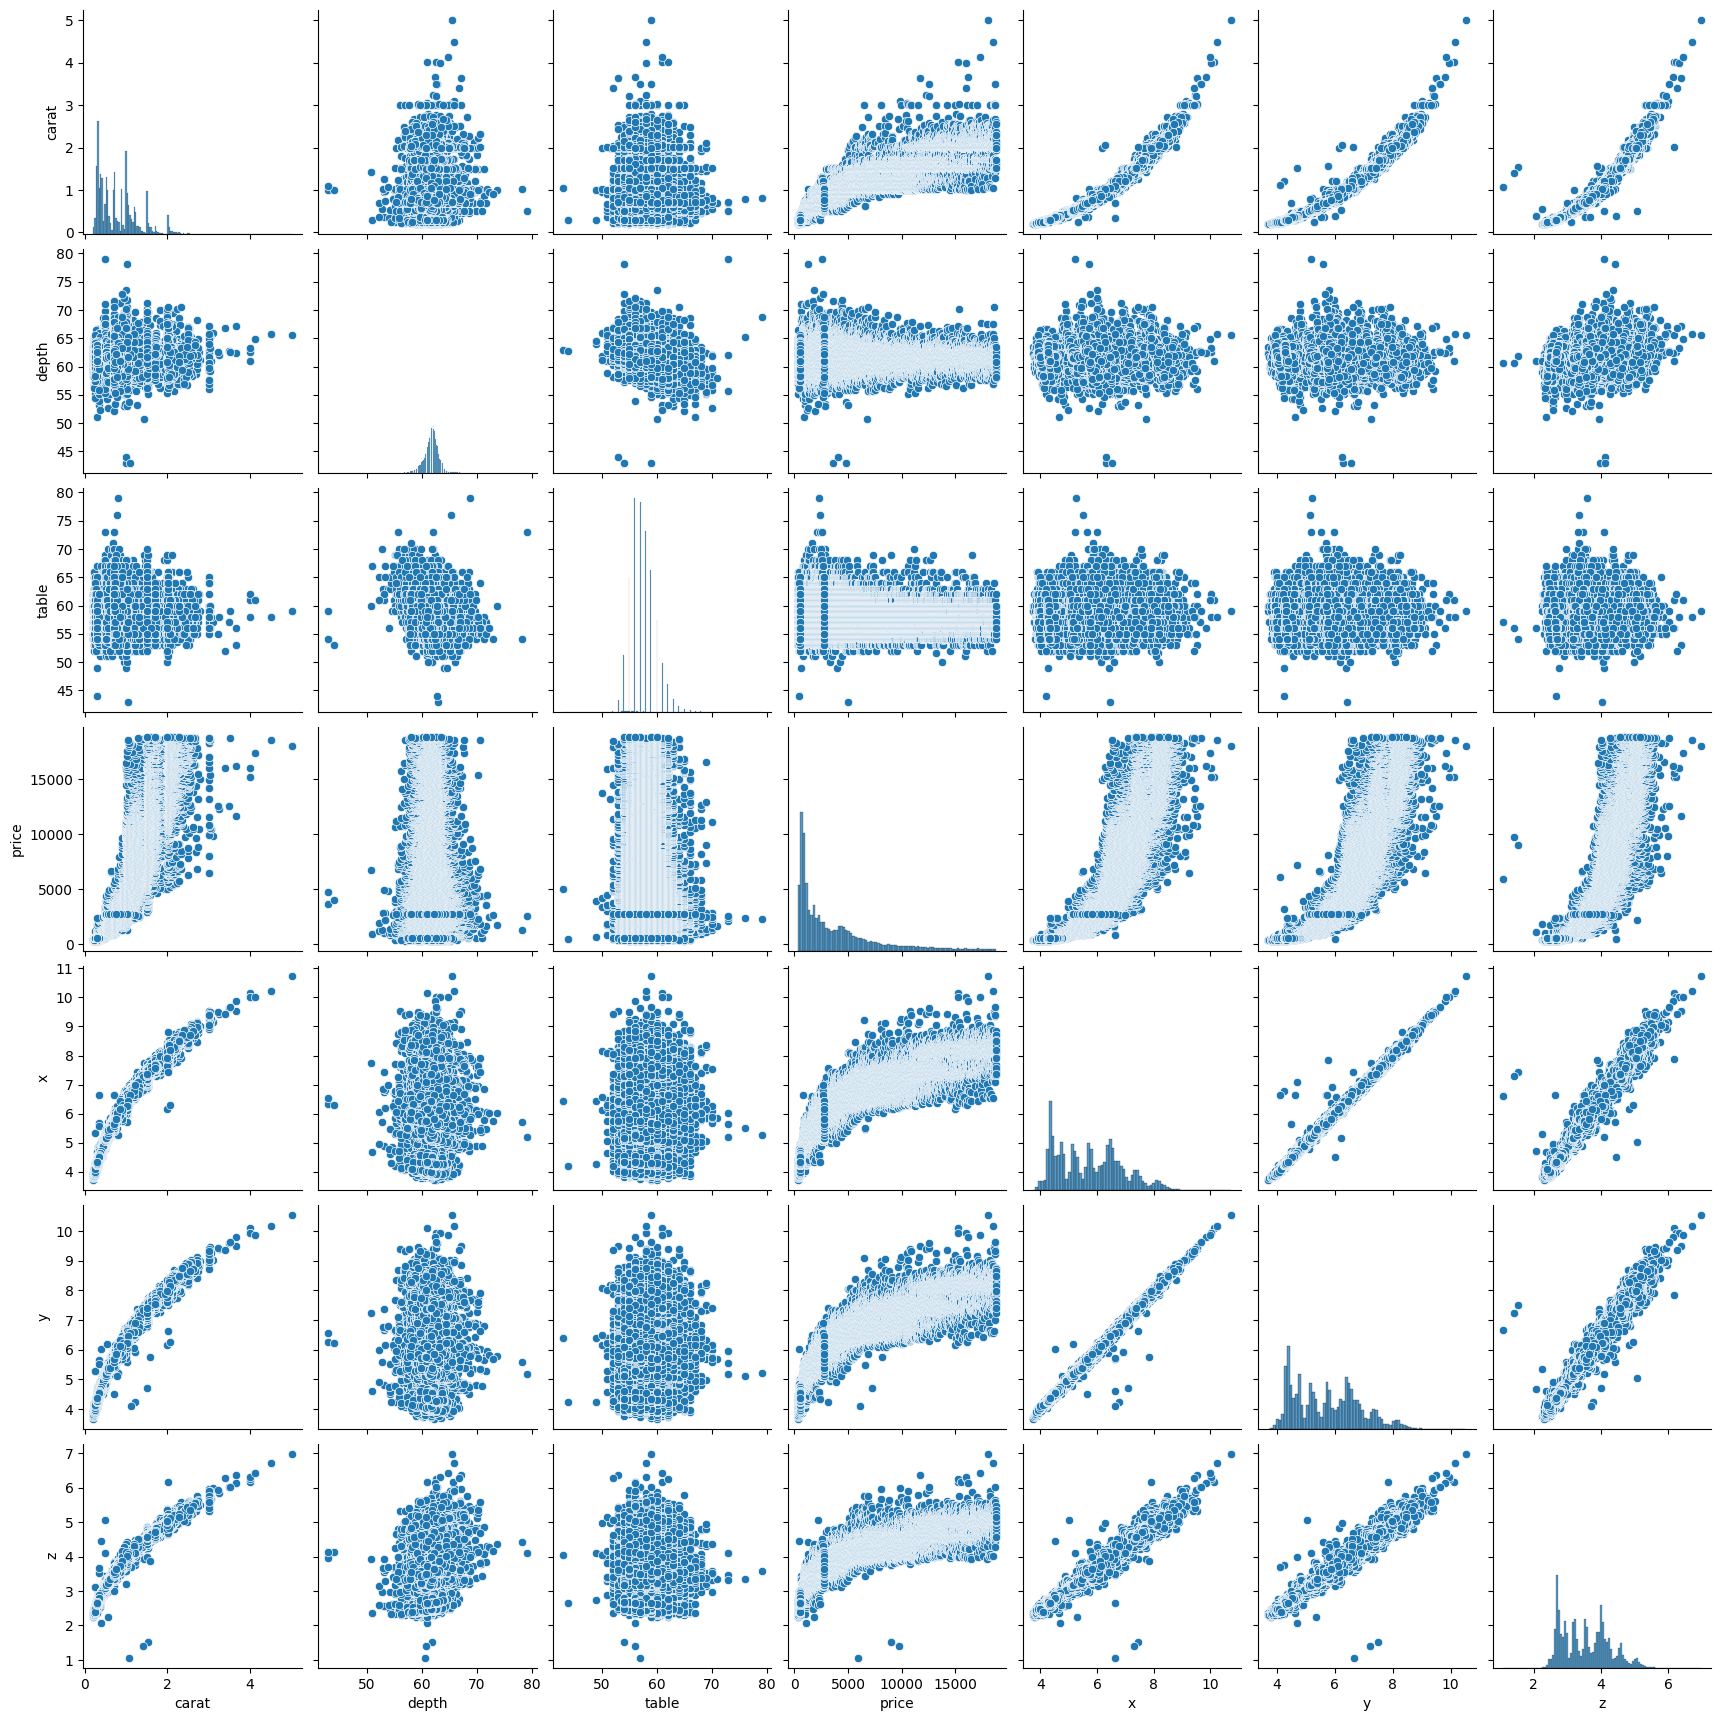

In [ ]:
# Pairplot sin valores extremos
sns.pairplot(df);

Es notable que podamos enfocarnos en la variable **precio**, ya que es la única que no presenta una relación facilmente observable con las demás variables. Esta particularidad sugiere varias posibilidades que exploraremos en profundidad más adelante en nuestro análisis

In [ ]:
# Descripción después de la limpieza
df.describe()

,carat,depth,table,price,x,y,z
count,53771.00,53771.00,53771.00,53771.00,53771.00,53771.00,53771.00
mean,0.80,61.75,57.46,3930.96,5.73,5.73,3.54
std,0.47,1.43,2.23,3985.68,1.12,1.11,0.69
min,0.20,43.00,43.00,326.00,3.73,3.68,1.07
25%,0.40,61.00,56.00,951.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5324.00,6.54,6.54,4.03
max,5.01,79.00,79.00,18823.00,10.74,10.54,6.98


Consideramos necesario utilizar *machine learning* para abordar nuestro problema porque permite:
- Manejar una gran cantidad de datos de forma automatizada y eficiente.
- Considerar las relaciones complejas entre las diferentes características de los diamantes para determinar cómo ciertas variables combinadas afectan su precio.
- Probar diferentes modelos, refinar y mejorarlos continuamente.

## 2.2 Conversión de valores categóricos a numéricos

*Machine learning* requiere que las variables que utilicemos sean numéricas, entonces a continuación asignamos valores numéricos a nuestras variables categóricas para poder incluirlas. Antes de realizar ese proceso, ejecutamos una exploración sobre estos datos que, por ser categóricos, no pudo realizarse en los *pairplot*.

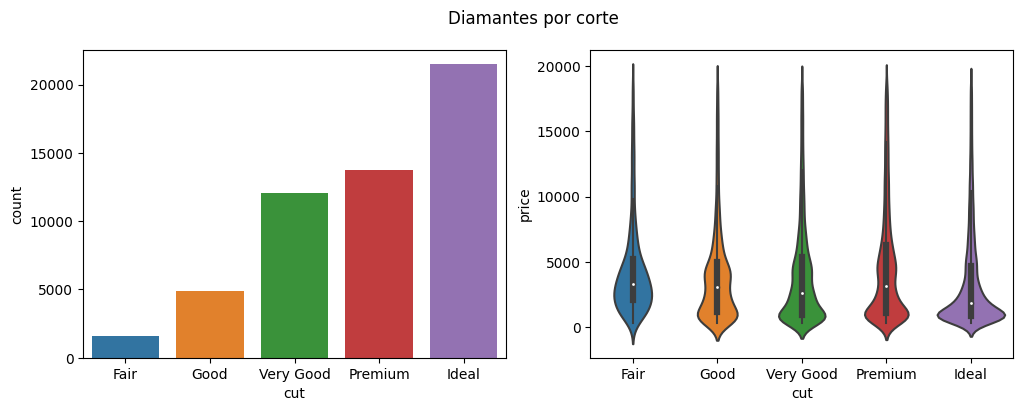

In [ ]:
# Corte
fig, ax =plt.subplots(1,2, figsize = (12,4))

fig.suptitle('Diamantes por corte')
sns.countplot(data = df, x = 'cut', order=['Fair','Good','Very Good','Premium','Ideal'], ax=ax[0])
sns.violinplot(data = df, x = 'cut', y = 'price', order=['Fair','Good','Very Good','Premium','Ideal'], ax=ax[1]);

En las gráficas se puede apreciar que:
*   La mayoría de los diamantes tienen un corte 'ideal'.
*   La mayoría de los diamantes en los cortes de 'good', 'very good' e 'ideal' se encuentran en el mismo precio.
*   El corte 'premium' puede llegar a ser el más caro.




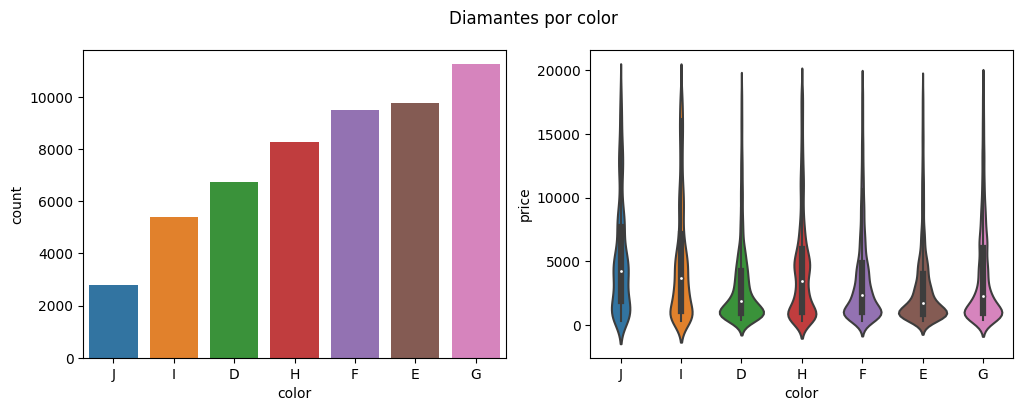

In [ ]:
# Color
fig, ax =plt.subplots(1,2, figsize = (12,4))

fig.suptitle('Diamantes por color')
sns.countplot(data = df, x = 'color', order=['J','I','D','H','F','E','G'], ax=ax[0])
sns.violinplot(data = df, x = 'color', y = 'price', order=['J','I','D','H','F','E','G'], ax=ax[1]);

En las gráficas se puede observar que:
*   La mayoría de los diamantes tienen son de los colores 'G', 'E' y 'F' respectivamante.
*   Los colores 'J' e 'I' suelen ser los más caros.
*   La mayoría de cada color de diamante se encuentra en el mismo precio aproximado.



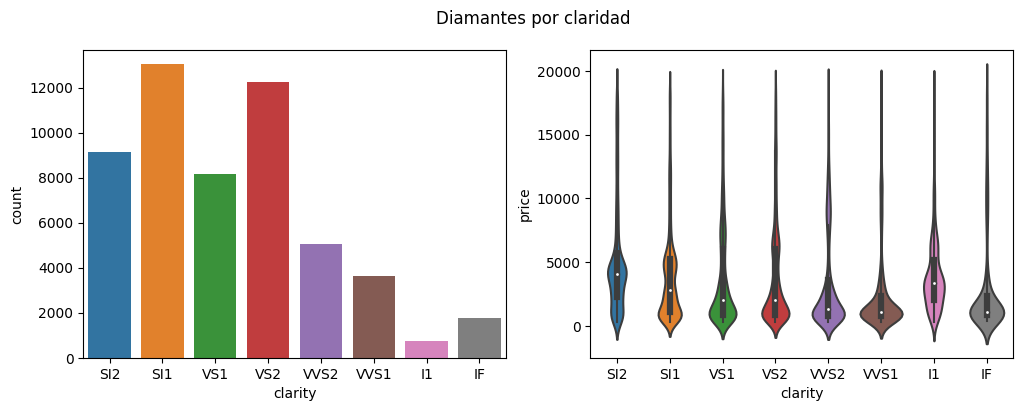

In [ ]:
# Claridad
fig, ax =plt.subplots(1,2, figsize = (12,4))

fig.suptitle('Diamantes por claridad')
sns.countplot(data = df, x = 'clarity', ax=ax[0])
sns.violinplot(data = df, x = 'clarity', y = 'price', ax=ax[1]);

En las gráficas se puede distinguir que:
*   La mayoría de los diamantes pertenecen a las categorías de 'SI1' y 'VS2' pero sus distribuciones son diferentes.
*   Los diamantes en 'VS1' y 'VS2' tienen distribuciones parecidas y pueden llegar a ser los más caros.

A continuación asignamos un valor numérico a las variables numéricas:

In [ ]:
# Columnas 'cut', 'color' y 'clarity'
label_encoder = LabelEncoder()
df['cut']= label_encoder.fit_transform(df['cut'])
df['color']= label_encoder.fit_transform(df['color'])
df['clarity']= label_encoder.fit_transform(df['clarity'])

df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.50,55.00,326,3.95,3.98,2.43
1,0.21,3,1,2,59.80,61.00,326,3.89,3.84,2.31
2,0.23,1,1,4,56.90,65.00,327,4.05,4.07,2.31
3,0.29,3,5,5,62.40,58.00,334,4.20,4.23,2.63
4,0.31,1,6,3,63.30,58.00,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53766,0.72,2,0,2,60.80,57.00,2757,5.75,5.76,3.50
53767,0.72,1,0,2,63.10,55.00,2757,5.69,5.75,3.61
53768,0.70,4,0,2,62.80,60.00,2757,5.66,5.68,3.56
53769,0.86,3,4,3,61.00,58.00,2757,6.15,6.12,3.74


*   A 'cut' se le asignaron valores entre 0 y 4 para sus cinco posibles valores.
*   A 'color' se le asignaron valores entre 0 y 6 para sus siete posibles valores.
*   A 'clarity' se le asignaron valores entre 0 y 7 para sus ocho posibles valores.

## 2.3 Selección de variables

El paso que sigue es seleccionar las variables, pero antes de hacerlo optamos por echar un vistazo a la correlación entre ellas.

In [ ]:
# Correlación de Pearson
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.00,0.02,0.29,-0.21,0.03,0.18,0.92,0.98,0.98,0.98
cut,0.02,1.00,0.00,0.03,-0.19,0.15,0.04,0.02,0.03,0.00
color,0.29,0.00,1.00,-0.03,0.05,0.03,0.17,0.27,0.27,0.27
clarity,-0.21,0.03,-0.03,1.00,-0.05,-0.09,-0.07,-0.23,-0.22,-0.23
depth,0.03,-0.19,0.05,-0.05,1.00,-0.30,-0.01,-0.03,-0.03,0.10
table,0.18,0.15,0.03,-0.09,-0.30,1.00,0.13,0.20,0.19,0.15
price,0.92,0.04,0.17,-0.07,-0.01,0.13,1.00,0.89,0.89,0.88
x,0.98,0.02,0.27,-0.23,-0.03,0.20,0.89,1.00,1.00,0.99
y,0.98,0.03,0.27,-0.22,-0.03,0.19,0.89,1.00,1.00,0.99
z,0.98,0.00,0.27,-0.23,0.10,0.15,0.88,0.99,0.99,1.00


Para apreciarlas de una mejor manera utilizamos el siguiente mapa de calor:

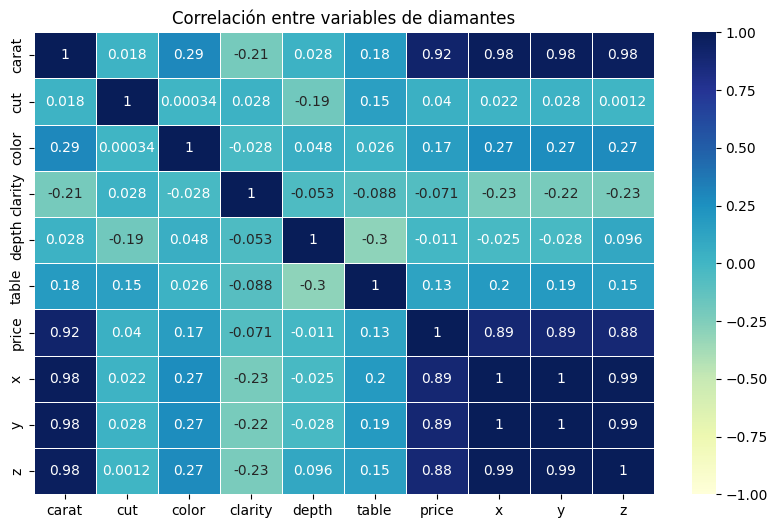

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu', linewidths=.5)
ax.set(title='Correlación entre variables de diamantes');

Se puede apreciar que:
*   Con excepción de 'clarity' y 'depth', todas las variables tienen una correlación positiva con 'price'.
*   Las variables que tienen una mayor correlación con precio son 'carat', 'x', 'y' y 'z'.

Después seleccionamos las variables 'x' y 'y':

In [ ]:
# x = variables independientes, y = dependiente
x = df.drop('price', axis=1).values
y = df['price'].values


*   Nuestra variable dependiente es 'price' porque es la que buscamos predecir a través de otras variables.
*   Decidimos integrar todas las demás variables como independientes porque a pesar de que 'carat', 'x', 'y' y 'z' tienen una mayor correlación, después de varias pruebas, nos dimos cuenta que los modelos que utilizaban todas las variables juntas tuvieron un mejor rendimiento.


A continuación las imprimimos para verificar que se hayan asignado correctamente:

In [ ]:
# Verificar x
print(x)

[[0.23 2.   1.   ... 3.95 3.98 2.43]
 [0.21 3.   1.   ... 3.89 3.84 2.31]
 [0.23 1.   1.   ... 4.05 4.07 2.31]
 ...
 [0.7  4.   0.   ... 5.66 5.68 3.56]
 [0.86 3.   4.   ... 6.15 6.12 3.74]
 [0.75 2.   0.   ... 5.83 5.87 3.64]]


In [ ]:
# Verificar y
print(y)

[ 326  326  327 ... 2757 2757 2757]


Sí se asignaron correctamente, pues:

*   'x' está compuesta de arrays de 9 valores que corresponden a los valores que tiene cada fila en las columnas de las variables independientes
*   'y' solo tiene un valor por cada fila de la variable dependiente.

## 2.3 Separación de datos

Posteriormente dividimos nuestros datos en set de entrenamiento y de prueba de forma aleatoria, asignando el 70% de los datos a entrenamiento y el 30% a test, con la semilla aleatoria '24'.

In [ ]:
# Entrenamiento 70%, Test 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=24)

print(f'Tamaño del conjunto de entrenamiento: {len(x_train)}')
print(f'Tamaño del conjunto de prueba: {len(x_test)}')

Tamaño del conjunto de entrenamiento: 37639
Tamaño del conjunto de prueba: 16132


# 3. Modelos de Machine Learning
## 3.1 Selección del modelo

In [ ]:
# Ignorar modelos con alto consumo de RAM
highmem_regressors = [
    "GammaRegressor", "GaussianProcessRegressor", "KernelRidge", "QuantileRegressor"
]
regressors = [reg for reg in lazypredict.Supervised.REGRESSORS if reg[0] not in highmem_regressors]

# Evaluar rápidamente modelos de ML
reg = LazyRegressor(regressors=regressors, verbose=1, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  3%|▎         | 1/38 [00:02<01:16,  2.06s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8842037025738718, 'Adjusted R-Squared': 0.8841390600557701, 'RMSE': 1365.910593451936, 'Time taken': 2.0602190494537354}


  5%|▌         | 2/38 [00:03<00:58,  1.63s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9791837783652837, 'Adjusted R-Squared': 0.9791721578470656, 'RMSE': 579.1297673987203, 'Time taken': 1.3344011306762695}
{'Model': 'BayesianRidge', 'R-Squared': 0.8862466469064055, 'Adjusted R-Squared': 0.886183144848482, 'RMSE': 1353.8078882805048, 'Time taken': 0.06356239318847656}


 11%|█         | 4/38 [00:03<00:24,  1.39it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9629288952269041, 'Adjusted R-Squared': 0.9629082005275518, 'RMSE': 772.8455330878775, 'Time taken': 0.29001545906066895}
{'Model': 'DummyRegressor', 'R-Squared': -8.295244205358543e-05, 'Adjusted R-Squared': -0.000641242143826215, 'RMSE': 4014.1440084112255, 'Time taken': 0.018310546875}
{'Model': 'ElasticNet', 'R-Squared': 0.8229316035558807, 'Adjusted R-Squared': 0.8228327562932584, 'RMSE': 1689.0615038732556, 'Time taken': 0.0330357551574707}


 21%|██        | 8/38 [00:04<00:09,  3.02it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.6221072273538595, 'Adjusted R-Squared': 0.6218962712098441, 'RMSE': 2467.5117515282022, 'Time taken': 0.3075566291809082}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9641517615183492, 'Adjusted R-Squared': 0.964131749476026, 'RMSE': 759.991695522118, 'Time taken': 0.153120756149292}


 24%|██▎       | 9/38 [00:12<01:01,  2.11s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9815482572587434, 'Adjusted R-Squared': 0.9815379566952481, 'RMSE': 545.2474362117451, 'Time taken': 7.9032886028289795}


 26%|██▋       | 10/38 [00:16<01:12,  2.59s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9722118254393605, 'Adjusted R-Squared': 0.9721963128744774, 'RMSE': 669.1214401863896, 'Time taken': 4.0137248039245605}


 29%|██▉       | 11/38 [00:16<00:55,  2.06s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.981335582319339, 'Adjusted R-Squared': 0.9813251630314637, 'RMSE': 548.3806968107112, 'Time taken': 0.5871419906616211}


 32%|███▏      | 12/38 [00:17<00:40,  1.57s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8755937642656694, 'Adjusted R-Squared': 0.8755243153063834, 'RMSE': 1415.780777362172, 'Time taken': 0.27425289154052734}


 39%|███▉      | 15/38 [00:17<00:17,  1.30it/s]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9571049177106239, 'Adjusted R-Squared': 0.9570809718142956, 'RMSE': 831.3400234245211, 'Time taken': 0.7664363384246826}
{'Model': 'Lars', 'R-Squared': 0.886249744748131, 'Adjusted R-Squared': 0.8861862444195572, 'RMSE': 1353.7894540497593, 'Time taken': 0.030567169189453125}
{'Model': 'LarsCV', 'R-Squared': 0.886249744748131, 'Adjusted R-Squared': 0.8861862444195572, 'RMSE': 1353.7894540497593, 'Time taken': 0.06881380081176758}


 42%|████▏     | 16/38 [00:18<00:15,  1.44it/s]

{'Model': 'Lasso', 'R-Squared': 0.8860052869383889, 'Adjusted R-Squared': 0.8859416501428576, 'RMSE': 1355.2433707411446, 'Time taken': 0.4622941017150879}


 45%|████▍     | 17/38 [00:19<00:14,  1.48it/s]

{'Model': 'LassoCV', 'R-Squared': 0.8849383657780207, 'Adjusted R-Squared': 0.8848741333807996, 'RMSE': 1361.5707268835301, 'Time taken': 0.6147465705871582}
{'Model': 'LassoLars', 'R-Squared': 0.8860190674825037, 'Adjusted R-Squared': 0.8859554383798702, 'RMSE': 1355.1614522248678, 'Time taken': 0.08985781669616699}


 53%|█████▎    | 20/38 [00:19<00:06,  2.73it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.886249744748131, 'Adjusted R-Squared': 0.8861862444195572, 'RMSE': 1353.7894540497593, 'Time taken': 0.1488802433013916}
{'Model': 'LassoLarsIC', 'R-Squared': 0.886249744748131, 'Adjusted R-Squared': 0.8861862444195572, 'RMSE': 1353.7894540497593, 'Time taken': 0.1099543571472168}


 58%|█████▊    | 22/38 [00:19<00:04,  3.88it/s]

{'Model': 'LinearRegression', 'R-Squared': 0.8862497447481295, 'Adjusted R-Squared': 0.8861862444195556, 'RMSE': 1353.7894540497687, 'Time taken': 0.11550641059875488}
{'Model': 'LinearSVR', 'R-Squared': 0.8227358296350404, 'Adjusted R-Squared': 0.8226368730829201, 'RMSE': 1689.9949929899567, 'Time taken': 0.12218880653381348}


 61%|██████    | 23/38 [00:40<01:27,  5.86s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9285890713771606, 'Adjusted R-Squared': 0.928549206697989, 'RMSE': 1072.648122737445, 'Time taken': 20.812506437301636}


 68%|██████▊   | 26/38 [02:00<02:57, 14.81s/it]

{'Model': 'NuSVR', 'R-Squared': 0.49086929858333983, 'Adjusted R-Squared': 0.4905850797325304, 'RMSE': 2864.109250391452, 'Time taken': 79.88160967826843}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8494738456549827, 'Adjusted R-Squared': 0.8493898154236774, 'RMSE': 1557.330968481937, 'Time taken': 0.03825974464416504}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8790616755799607, 'Adjusted R-Squared': 0.8789941625592573, 'RMSE': 1395.9083667599127, 'Time taken': 0.10646748542785645}


 71%|███████   | 27/38 [02:00<02:04, 11.28s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8716137239807845, 'Adjusted R-Squared': 0.8715420531903011, 'RMSE': 1438.249519611963, 'Time taken': 0.17262625694274902}


 74%|███████▎  | 28/38 [02:01<01:25,  8.53s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.9204633012558632, 'Adjusted R-Squared': 0.9204189004191992, 'RMSE': 1132.0320358015322, 'Time taken': 0.5467135906219482}


 76%|███████▋  | 29/38 [02:01<00:56,  6.32s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.8019029263759354, 'Adjusted R-Squared': 0.8017923399931903, 'RMSE': 1786.5450283747748, 'Time taken': 0.25298285484313965}


 79%|███████▉  | 30/38 [02:15<01:06,  8.37s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9806869227385753, 'Adjusted R-Squared': 0.980676141340774, 'RMSE': 557.8284699725956, 'Time taken': 13.719278335571289}
{'Model': 'Ridge', 'R-Squared': 0.8862407204258878, 'Adjusted R-Squared': 0.8861772150595457, 'RMSE': 1353.8431541050136, 'Time taken': 0.027001142501831055}
{'Model': 'RidgeCV', 'R-Squared': 0.886240720425784, 'Adjusted R-Squared': 0.8861772150594418, 'RMSE': 1353.8431541056311, 'Time taken': 0.05588960647583008}


 87%|████████▋ | 33/38 [02:15<00:19,  3.88s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.885680781460749, 'Adjusted R-Squared': 0.8856169635121786, 'RMSE': 1357.1709661101436, 'Time taken': 0.22807002067565918}


 89%|████████▉ | 34/38 [03:38<01:20, 20.05s/it]

{'Model': 'SVR', 'R-Squared': 0.4823831517404864, 'Adjusted R-Squared': 0.48209419555426036, 'RMSE': 2887.8799712596065, 'Time taken': 82.63012194633484}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8862497447481295, 'Adjusted R-Squared': 0.8861862444195556, 'RMSE': 1353.7894540497687, 'Time taken': 0.0401761531829834}


 95%|█████████▍| 36/38 [03:38<00:25, 12.72s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.789721566555139, 'Adjusted R-Squared': 0.7896041800087426, 'RMSE': 1840.6546112025594, 'Time taken': 0.3731353282928467}


 97%|█████████▋| 37/38 [03:38<00:10, 10.13s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9803055239538171, 'Adjusted R-Squared': 0.9802945296426636, 'RMSE': 563.309599667627, 'Time taken': 0.3455991744995117}
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1276
[LightGBM] [Info] Number of data points in the train set: 37639, number of used features: 9
[LightGBM] [Info] Start training from score 3919.993411


100%|██████████| 38/38 [03:39<00:00,  5.77s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9817058697362218, 'Adjusted R-Squared': 0.9816956571588509, 'RMSE': 542.9137242705267, 'Time taken': 0.3986244201660156}


In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.98,0.98,542.91,0.40
ExtraTreesRegressor,0.98,0.98,545.25,7.90
HistGradientBoostingRegressor,0.98,0.98,548.38,0.59
RandomForestRegressor,0.98,0.98,557.83,13.72
XGBRegressor,0.98,0.98,563.31,0.35
BaggingRegressor,0.98,0.98,579.13,1.33
GradientBoostingRegressor,0.97,0.97,669.12,4.01
ExtraTreeRegressor,0.96,0.96,759.99,0.15
DecisionTreeRegressor,0.96,0.96,772.85,0.29


In [ ]:
models.loc[['LGBMRegressor', 'RandomForestRegressor', 'LinearRegression']]

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.98,0.98,542.91,0.40
RandomForestRegressor,0.98,0.98,557.83,13.72
LinearRegression,0.89,0.89,1353.79,0.12


## 3.2 Regresión lineal
### Crear y entrenar modelo de regresión

In [ ]:
# Crear modelo de regresión
lr = LinearRegression()

# Entrenar
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predicciones en el conjunto de prueba
y_pred_lr = lr.predict(x_test)
print(y_pred_lr)

[4528.13951116 7781.92499367 1308.62011412 ...  330.24039648 7386.5331211
 5574.15162331]


### Probar y evaluar modelo de regresión

In [ ]:
# Prueba con primera observación
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.50,55.00,326,3.95,3.98,2.43


In [ ]:
print(f'Valor de "price" predecido por la regresión lineal: {lr.predict([[0.23, 2, 1, 3, 61.50, 55.00, 3.95, 3.98, 2.43]])}')

Valor de "price" predecido por la regresión lineal: [228.27011315]


MSE: 1832745.8858963682
R^2: 0.8862497447481297


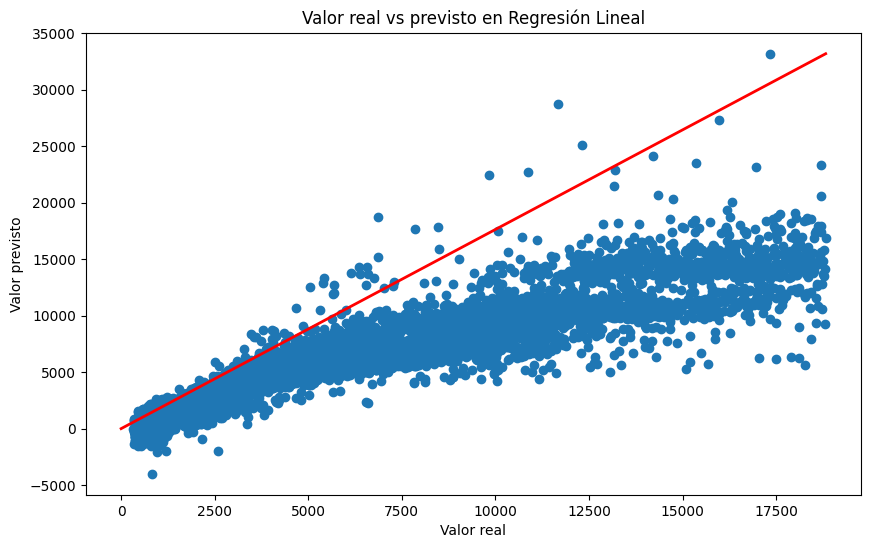

In [ ]:
# Valor real vs previsto
plt.figure(figsize= (10,6))
plt.scatter(y_test, y_pred_lr)

# Línea para referencia
plt.plot([0, max(y_test)], [0, max(y_pred_lr)], color='red', linewidth=2)

# Etiquetas
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.title('Valor real vs previsto en Regresión Lineal');

# Error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred_lr)

# Coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred_lr)

# Imprimir el MSE y R^2
print("MSE:", mse)
print("R^2:", r2)

In [ ]:
# Validación cruzada
cv_scores = cross_val_score(lr, df[['x']], df['y'], cv=5)
print("CV Scores:", cv_scores)
print("Promedio de CV Scores:", np.mean(cv_scores))

CV Scores: [0.99167568 0.99230745 0.998919   0.97642665 0.98686807]
Promedio de CV Scores: 0.9892393717964818


# Conclusion del uso de Regresion lineal
Al usar este modelo y obtener el MSE y r2, podemos observar que el MSE esta muy elevado, lo que nos indica que las predicciones y la calidad de estas no son buenas. Y podemos observar con la grafica que debido a los valores que tenemos la recta se aleja de la mayoria de estos.


## 3.3 Random forest
### Crear y entrenar random forest

In [ ]:
# Crear random forest
rf = RandomForestRegressor()

# Entrenar
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
# Predicciones en el conjunto de prueba
y_pred_rf = rf.predict(x_test)
print(y_pred_rf)

[ 4313.35 12913.54  1457.54 ...   974.97  7867.81  4511.14]


### Probar y evaluar random forest

In [ ]:
# Prueba con con primera observación
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.50,55.00,326,3.95,3.98,2.43


In [ ]:
print(f'Valor de "price" predecido por el random forest: {rf.predict([[0.23, 2, 1, 3, 61.50, 55.00, 3.95, 3.98, 2.43]])}')

Valor de "price" predecido por el random forest: [377.34]


MSE: 316226.89861621294
R^2: 0.9803732253817017


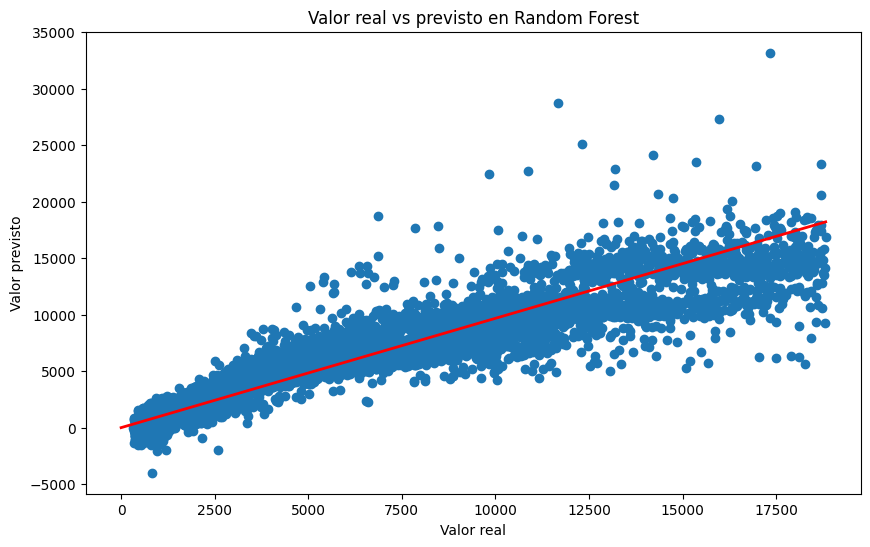

In [ ]:
# Valor real vs previsto
plt.figure(figsize= (10,6))
plt.scatter(y_test, y_pred_lr)

# Línea para referencia
plt.plot([0, max(y_test)], [0, max(y_pred_rf)], color='red', linewidth=2)

# Etiquetas
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.title('Valor real vs previsto en Random Forest');

# Error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred_rf)

# Coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred_rf)

# Imprimir el MSE y R^2
print("MSE:", mse)
print("R^2:", r2)

In [ ]:
# Validación cruzada
cv_scores = cross_val_score(rf, df[['x']], df['y'], cv=5)
print("CV Scores:", cv_scores)
print("Promedio de CV Scores:", np.mean(cv_scores))

CV Scores: [0.99100784 0.99179465 0.99756501 0.97551385 0.9861407 ]
Promedio de CV Scores: 0.9884044077342408


# 3.4 LGBM
## Crear y entrenar LGBM

In [ ]:
# Crear modelo de LGBM
lgbm = LGBMRegressor(force_col_wise=True)

# Entrenar
lgbm.fit(x_train, y_train)

[LightGBM] [Info] Total Bins 1267
[LightGBM] [Info] Number of data points in the train set: 37639, number of used features: 9
[LightGBM] [Info] Start training from score 3919.993411


LGBMRegressor(force_col_wise=True)

In [ ]:
# Predicciones en el conjunto de prueba
y_pred_lgbm = lgbm.predict(x_test)
print(y_pred_lgbm)

[ 4153.81400792 13528.91169681  1424.60340241 ...  1026.1074849
  8546.23203138  4214.72452869]


### Probar y evaluar LGBM

In [ ]:
# Prueba con con primera observación
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.50,55.00,326,3.95,3.98,2.43


In [ ]:
print(f'Valor de "price" predecido por nuestro modelo: {lgbm.predict([[0.23, 2, 1, 3, 61.50, 55.00, 3.95, 3.98, 2.43]])}')

Valor de "price" predecido por nuestro modelo: [496.59265086]


MSE: 294798.42953734857
R^2: 0.9817031936256001


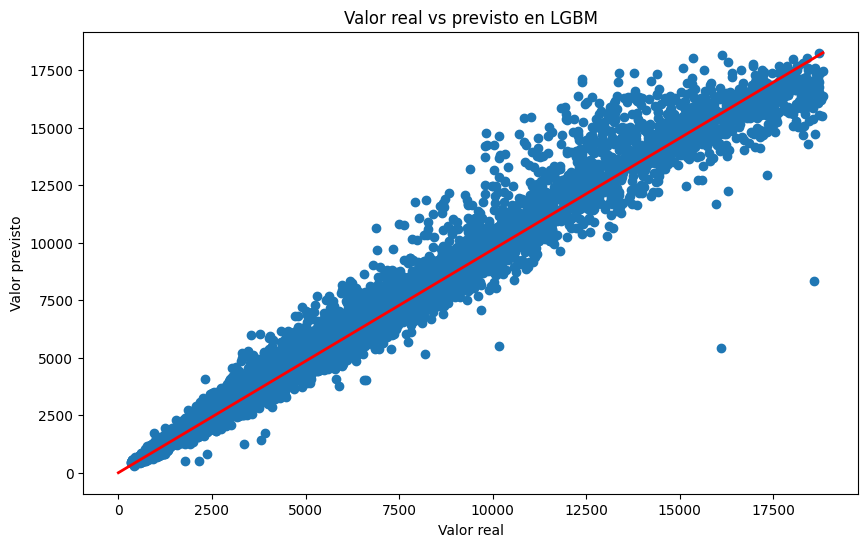

In [ ]:
# Valor real vs previsto
plt.figure(figsize= (10,6))
plt.scatter(y_test, y_pred_lgbm)

# Línea para referencia
plt.plot([0, max(y_test)], [0, max(y_pred_lgbm)], color='red', linewidth=2)

# Etiquetas
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.title('Valor real vs previsto en LGBM');

# Error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred_lgbm)

# Coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred_lgbm)

# Imprimir el MSE y R^2
print("MSE:", mse)
print("R^2:", r2)

In [ ]:
# Validación cruzada
cv_scores = cross_val_score(lgbm, df[['x']], df['y'], cv=5)
print("CV Scores:", cv_scores)
print("Promedio de CV Scores:", np.mean(cv_scores))

[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 43016, number of used features: 1
[LightGBM] [Info] Start training from score 5.667171
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 43017, number of used features: 1
[LightGBM] [Info] Start training from score 5.532514
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 43017, number of used features: 1
[LightGBM] [Info] Start training from score 5.643676
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 43017, number of used features: 1
[LightGBM] [Info] Start training from score 5.993481
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 43017, number of used features: 1
[LightGBM] [Info] Start training from score 5.830148
CV Scores: [0.99089582 0.99188481 0.99507147 0.97436803 0.98551615]
Promedio de CV Scores: 0.9875472565913377


## 3.5 Regresión Lineal vs Random Forest vs LGBM

In [ ]:
# DataFrame con todas las predicciones
y_pred_df=pd.DataFrame({
    'valor_real': y_test,
    'pred_lgbm':y_pred_lgbm,
    'pred_rf': y_pred_rf,
    'pred_lr': y_pred_lr
})

y_pred_df.head(20)

,valor_real,pred_lgbm,pred_rf,pred_lr
0,4268,4153.81,4313.35,4528.14
1,14584,13528.91,12913.54,7781.92
2,1332,1424.60,1457.54,1308.62
3,10655,10928.12,11171.56,9444.82
4,782,902.12,813.28,904.84
5,3959,3868.91,3662.01,4570.55
6,5884,5733.92,5863.83,7094.33
7,2044,1841.86,1898.83,2227.76
8,491,543.41,493.10,-303.46
9,545,618.34,552.44,263.87


In [ ]:
y_pred_df.tail(20)

,valor_real,pred_lgbm,pred_rf,pred_lr
16112,16704,14049.41,12845.04,13369.05
16113,17574,15359.21,15346.65,14048.89
16114,5081,4944.12,4660.83,4919.39
16115,14294,13671.79,13584.50,10302.82
16116,7392,7320.20,7573.99,5511.35
16117,1669,1448.52,1376.80,1407.06
16118,1550,1621.08,1656.89,2144.89
16119,4919,4981.13,4836.45,5743.63
16120,789,777.90,777.23,1523.22
16121,2394,2144.54,2211.08,2953.85
